In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


**Step 2: Visualize the Data**

<Axes: xlabel='Month'>

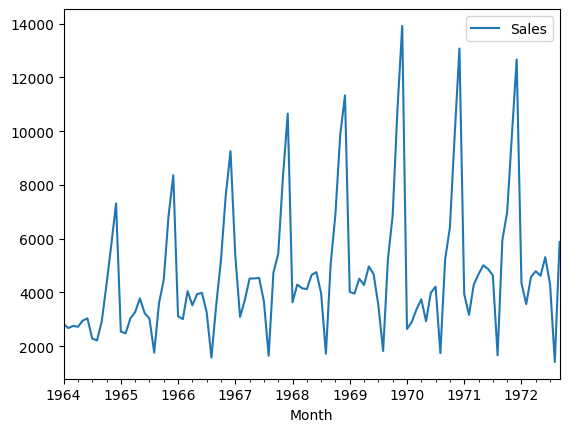

In [15]:
df.plot()

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Sales'])

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Differencing**

In [20]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [21]:
df['Sales'].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,2815.0
1964-03-01,2672.0
1964-04-01,2755.0
1964-05-01,2721.0
...,...
1972-05-01,4788.0
1972-06-01,4618.0
1972-07-01,5312.0


In [22]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [23]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [24]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

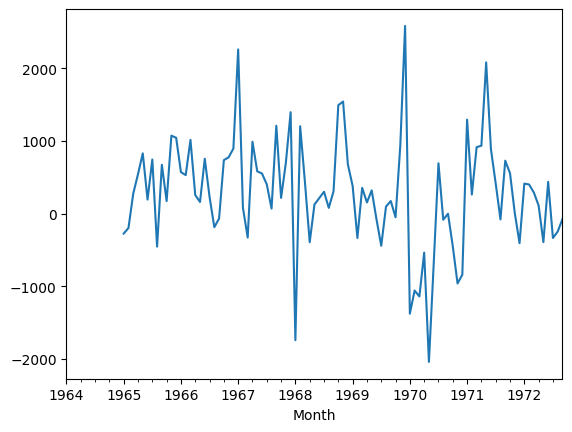

In [25]:
df['Seasonal First Difference'].plot()

**Auto Regressive(AR) Model**

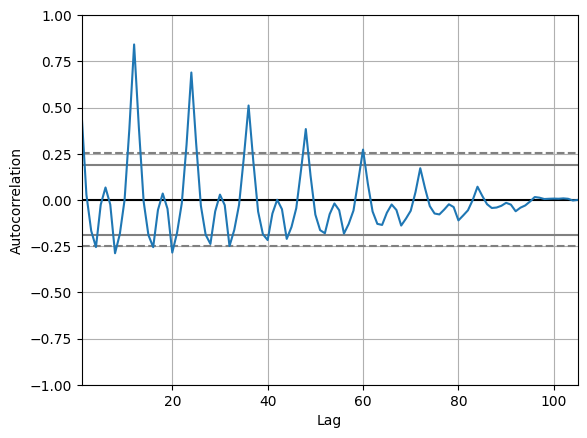

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

**Final Thoughts on Autocorrelation and Partial Autocorrelation**

*Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

*Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

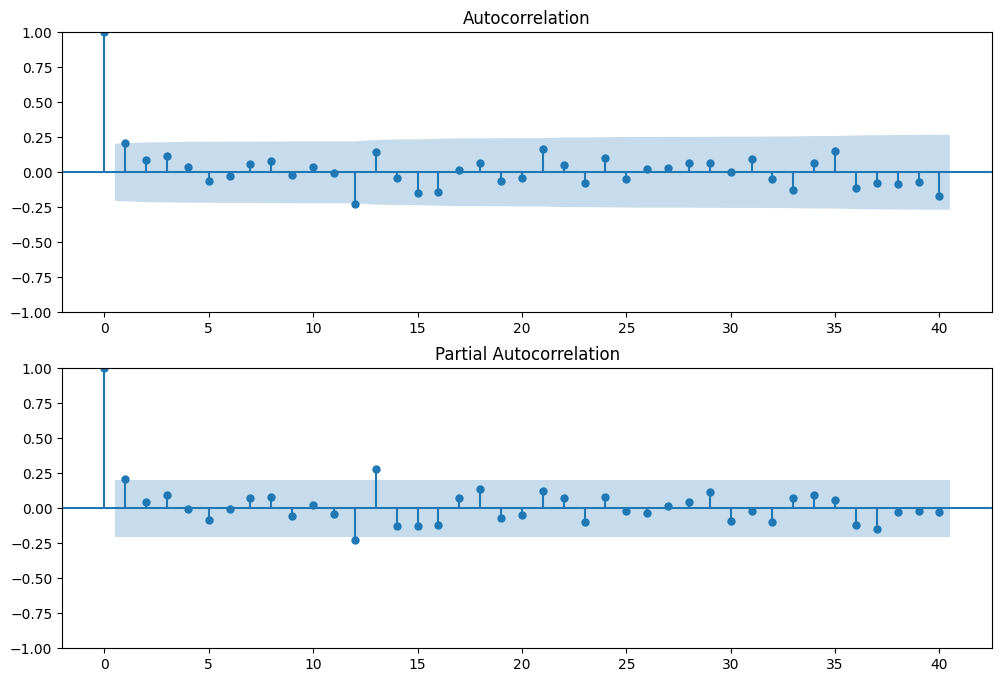

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# Task
Import `statsmodels.api as sm` to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the 'Seasonal First Difference' series, then analyze the plots to identify appropriate p and q parameters for ARIMA or SARIMA models.

## Import statsmodels as sm

### Subtask:
Add `import statsmodels.api as sm` to make the `sm` alias available for plotting autocorrelation and partial autocorrelation functions.


**Reasoning**:
The current error indicates that 'sm' is not defined. This is because `statsmodels.api` was not imported. Importing `statsmodels.api as sm` will resolve this issue and make the alias 'sm' available.



In [30]:
import statsmodels.api as sm
print("statsmodels imported as sm")

statsmodels imported as sm


**Reasoning**:
Since `statsmodels.api` is now imported as `sm`, the previous plotting code can be re-executed to generate the ACF and PACF plots for the 'Seasonal First Difference' series. This will help in identifying appropriate p and q parameters.



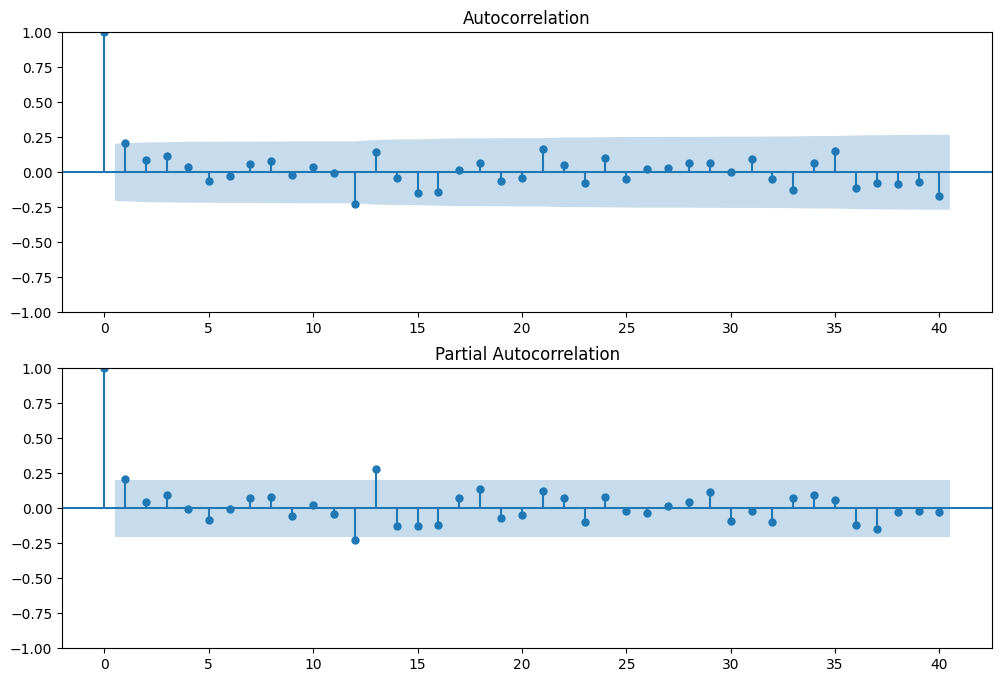

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Based on the ACF and PACF plots for the 'Seasonal First Difference' series:

*   **ACF (Autocorrelation Function) Plot:**
    The ACF plot shows a significant spike at lag 1 and then cuts off quickly. There is also a significant spike at lag 12, indicating a seasonal component. The spikes at lag 1 and lag 12 suggest a moving average (MA) order. Considering the seasonal difference, a seasonal MA (Q) of 1 could be appropriate, and a non-seasonal MA (q) of 1 might also be considered.

*   **PACF (Partial Autocorrelation Function) Plot:**
    The PACF plot shows a significant spike at lag 1, and then it tapers off. There is also a significant spike at lag 12, followed by a tapering pattern. The spikes at lag 1 and lag 12 suggest an autoregressive (AR) order. Considering the seasonal difference, a seasonal AR (P) of 1 could be appropriate, and a non-seasonal AR (p) of 1 might also be considered.

**Preliminary parameters for SARIMA model (p,d,q)(P,D,Q,s):**

*   **d (differencing order):** 1 (from the first difference)
*   **D (seasonal differencing order):** 1 (from the seasonal first difference, with season `s=12`)
*   **p (non-seasonal AR order):** 1 (from PACF tapering after lag 1)
*   **q (non-seasonal MA order):** 1 (from ACF cutting off after lag 1)
*   **P (seasonal AR order):** 1 (from PACF tapering after lag 12)
*   **Q (seasonal MA order):** 1 (from ACF cutting off after lag 12)
*   **s (seasonal period):** 12 (monthly data)

Therefore, a potential SARIMA model could be SARIMA(1,1,1)(1,1,1,12).

## Train a SARIMA model

### Subtask:
Train a Seasonal Autoregressive Integrated Moving Average (SARIMA) model using the identified p, d, q, P, D, Q, and s parameters.


**Reasoning**:
The first step in training a SARIMA model is to import the necessary class, `SARIMAX`, from `statsmodels.tsa.statespace.sarimax`.



In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
print("SARIMAX imported")

SARIMAX imported


**Reasoning**:
Now that SARIMAX is imported, the next step is to instantiate the SARIMA model with the identified order and seasonal_order parameters and then fit it to the 'Sales' data. The first 13 rows will be dropped due to NaN values in 'Seasonal First Difference'.



In [33]:
model = SARIMAX(df['Sales'].iloc[13:], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   92
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -635.852
Date:                            Thu, 19 Feb 2026   AIC                           1281.704
Time:                                    07:00:23   BIC                           1293.551
Sample:                                02-01-1965   HQIC                          1286.450
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2730      0.089      3.054      0.002       0.098       0.448
ma.L1         -0.9352      0.051   

**Reasoning**:
The SARIMA model has been fitted. The next logical step is to make predictions using the trained model to evaluate its performance and forecast future values.



In [34]:
## Make predictions with the trained SARIMA model

**Reasoning**:
To evaluate the SARIMA model's performance, I will generate in-sample predictions and plot them against the actual 'Sales' data. This will allow for a visual assessment of how well the model captures the observed trends and seasonality.



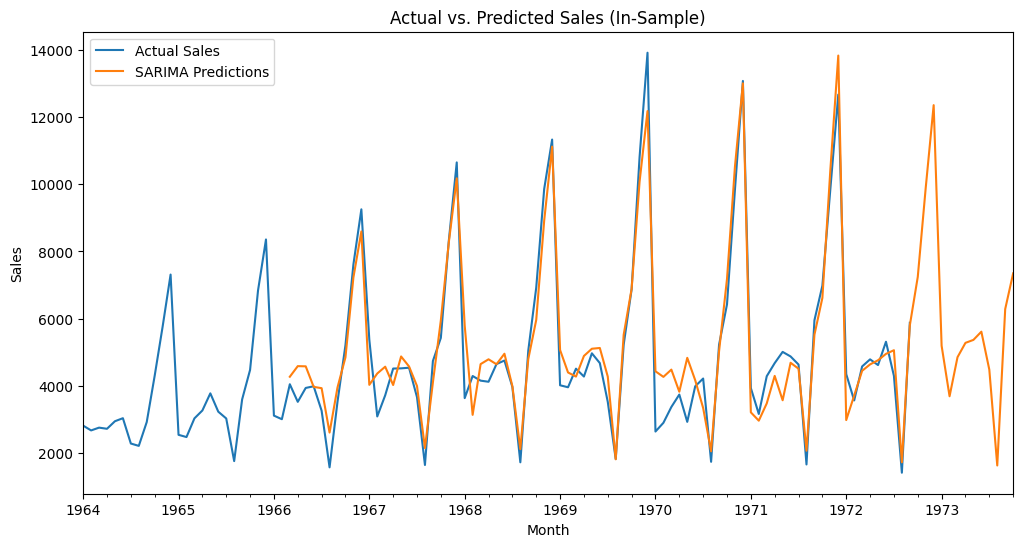

In [35]:
start_index = len(df) - len(model_fit.fittedvalues)
predictions = model_fit.get_prediction(start=start_index, end=len(df)-1)
pred_mean = predictions.predicted_mean

# Plotting the predictions
df['Sales'].plot(legend=True, figsize=(12, 6), label='Actual Sales')
pred_mean.plot(legend=True, label='SARIMA Predictions')
plt.title('Actual vs. Predicted Sales (In-Sample)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Forecast future sales

### Subtask:
Generate future sales forecasts using the trained SARIMA model and visualize them, including confidence intervals.


**Reasoning**:
To generate future forecasts, I need to define the number of steps into the future that the model should predict. A common approach is to forecast for a reasonable period, such as 24 months, to observe trends.



In [36]:
num_forecast_steps = 24
print(f"Number of future forecast steps set to: {num_forecast_steps}")

Number of future forecast steps set to: 24


**Reasoning**:
Now that the number of forecast steps is defined, I will use the trained SARIMA model to generate future predictions and their confidence intervals, then visualize these forecasts along with the historical data.



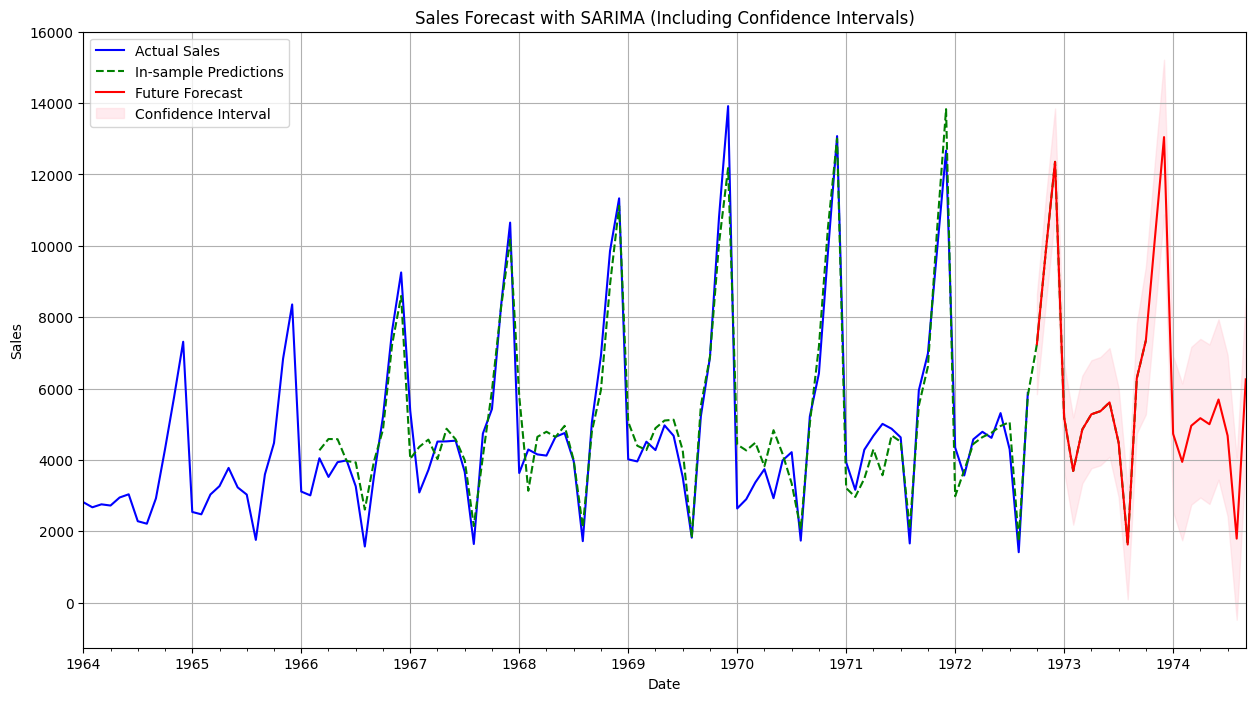

In [37]:
forecast = model_fit.get_forecast(steps=num_forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(15, 8))
df['Sales'].plot(label='Actual Sales', color='blue')
pred_mean.plot(label='In-sample Predictions', color='green', linestyle='--')
forecast_mean.plot(label='Future Forecast', color='red')

plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Sales Forecast with SARIMA (Including Confidence Intervals)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate the model by analyzing residuals

### Subtask:
Plot the residuals of the SARIMA model and analyze their characteristics.


**Reasoning**:
To begin analyzing the residuals, I need to access them from the fitted SARIMA model. The `model_fit.resid` attribute provides these residuals, which will then be plotted to visualize their distribution over time.



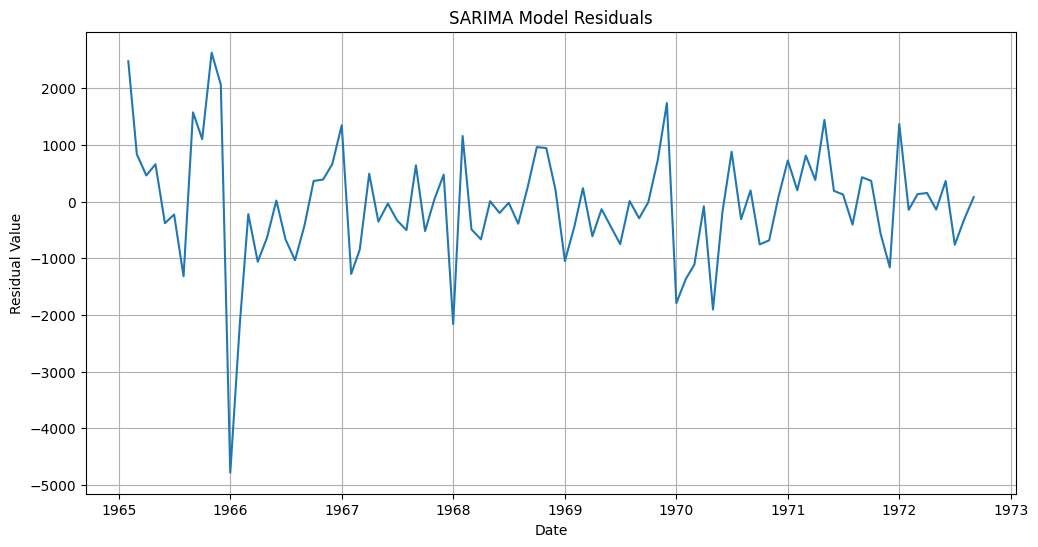

In [38]:
residuals = model_fit.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('SARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show()

**Reasoning**:
After plotting the residuals, the next step is to perform an Augmented Dickey-Fuller (ADF) test on them to formally check for stationarity. This will help confirm if the residuals are white noise, a key assumption for a good model.



In [39]:
adfuller_test(residuals)


ADF Test Statistic : -8.510757351174547
p-value : 1.169237248235839e-13
#Lags Used : 0
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


**Reasoning**:
To complete the residual analysis, I need to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the residuals to identify any remaining significant autocorrelation, which would indicate if the model has captured all the patterns in the data.



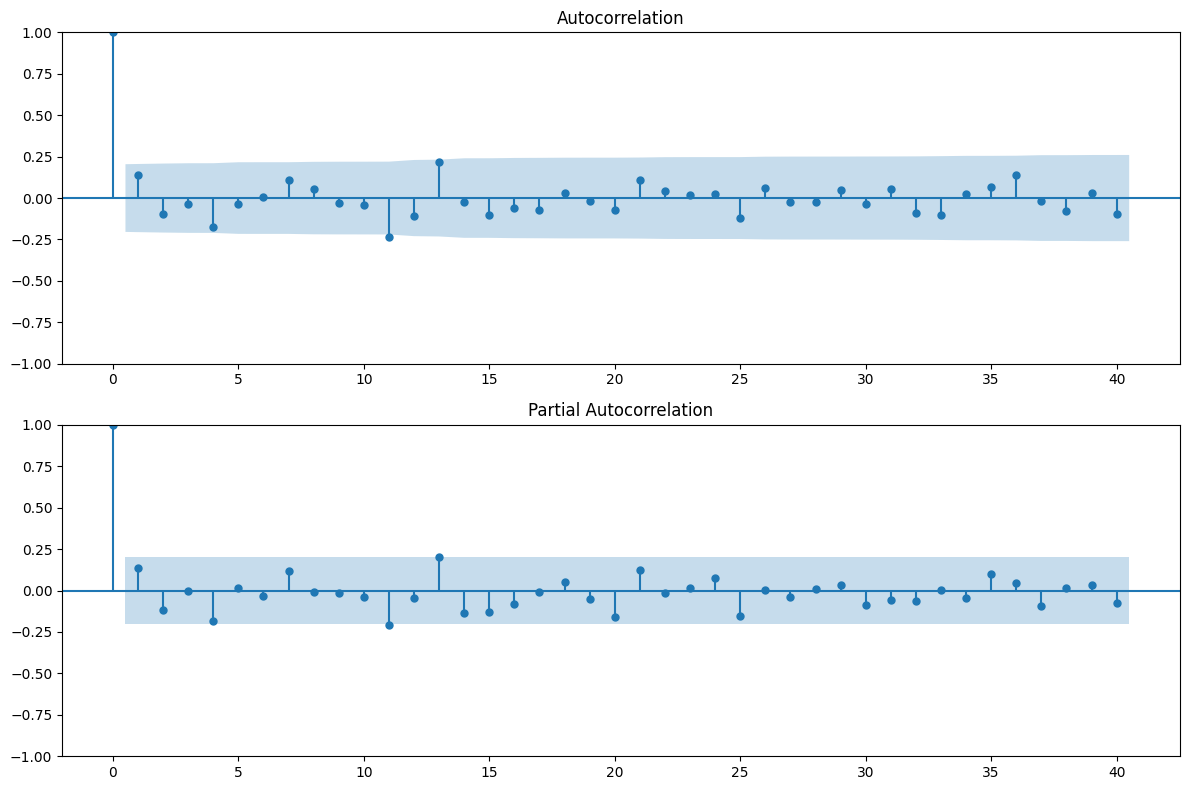

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals,lags=40,ax=ax2)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
Based on the ACF and PACF plots for the 'Seasonal First Difference' series, the identified parameters for a SARIMA model are:
*   Non-seasonal order (p,d,q): (1,1,1)
*   Seasonal order (P,D,Q,s): (1,1,1,12)

This suggests a potential SARIMA(1,1,1)(1,1,1,12) model.

### Data Analysis Key Findings
*   The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots of the 'Seasonal First Difference' series indicated significant spikes at lag 1 and lag 12 for both, suggesting non-seasonal (p=1, q=1) and seasonal (P=1, Q=1) components. The differencing orders (d=1, D=1 with s=12) were established from prior data transformations.
*   A SARIMA(1,1,1)(1,1,1,12) model was successfully trained using the identified parameters. The model fit produced a summary including `Log Likelihood`, `AIC`, and `BIC` values, and showed reasonable in-sample predictions when plotted against actual sales.
*   Future sales forecasts for 24 steps were generated using the trained SARIMA model, complete with visualized confidence intervals.
*   Residual analysis of the trained model showed that the residuals are stationary, as confirmed by an Augmented Dickey-Fuller (ADF) test with a p-value of 1.17e-13. The ACF and PACF plots of the residuals did not show strong significant autocorrelations, suggesting that the model has captured most of the underlying patterns.
*   A warning about a singular/near-singular covariance matrix was noted during model training, which might impact the stability of standard errors.

